In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format


In [2]:
import helper.yahoo_api as ya

df_of_symbols_set = pd.read_excel('C:/Users/phata/Documents/GitHub/quant_tools/helper/set_symbol_list.xlsx')
list_of_symbols_set = df_of_symbols_set['symbol'].to_list()

# a df of OHLC and volume
def get_data_1d_SET(symbol: str, int_start_year = None, int_end_year = None): 
    df = ya.get_data_1d(symbol)
    if int_start_year is not None: df = df[df.index.year >= int_start_year]
    if int_end_year is not None: df = df[df.index.year <= int_end_year]
    return df[df > 0] # Quick fix for negative prices

In [3]:
assets = ['DELTA', 'TOP']

df = yf.download([str + '.BK' for str in assets])['Close']
df.columns = df.columns.str.rstrip('.BK')


[*********************100%***********************]  2 of 2 completed


In [4]:
df_returns = df.pct_change().dropna()

In [6]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=df_returns)

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)


In [7]:
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,DELTA,TOP
weights,87.1332%,12.8668%


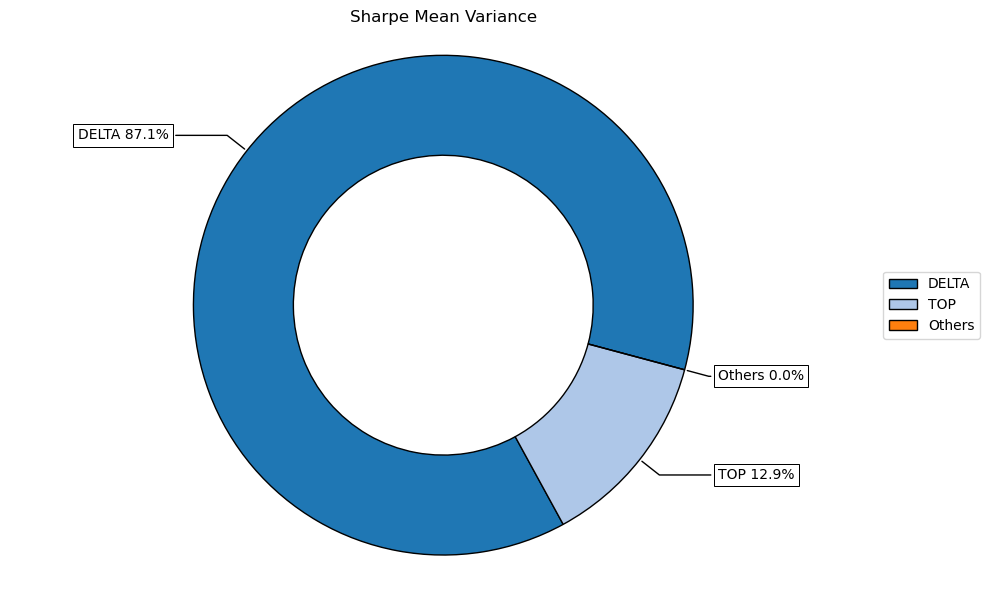

In [8]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

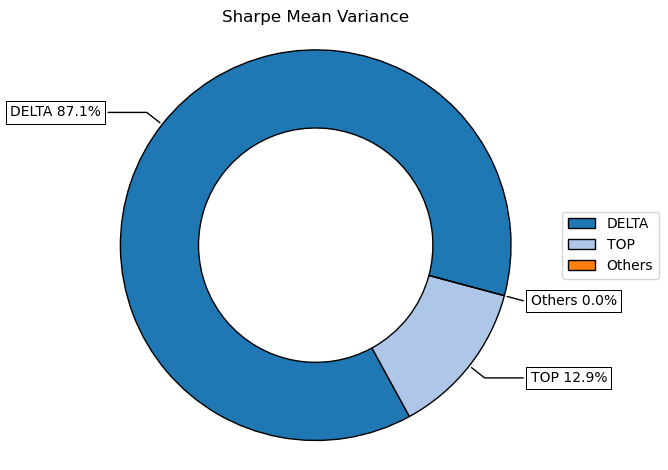

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=ax)
plt.show(fig)

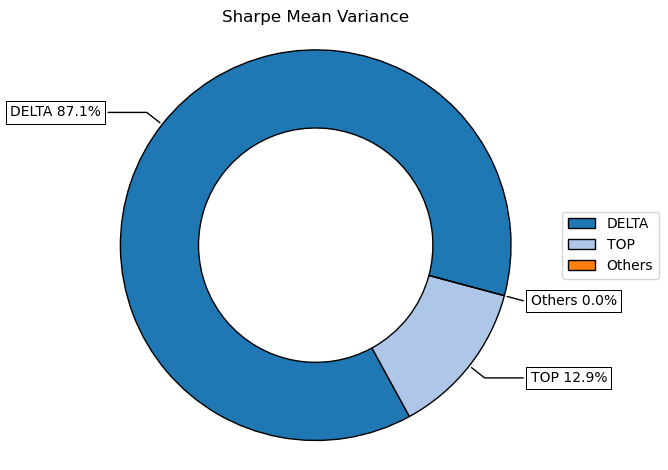

In [10]:
fig